In [26]:
import pandas as pd

merged_results = pd.read_excel('all_merged_data.xlsx')

numeric_data = merged_results.iloc[:,4:13]


<Axes: >

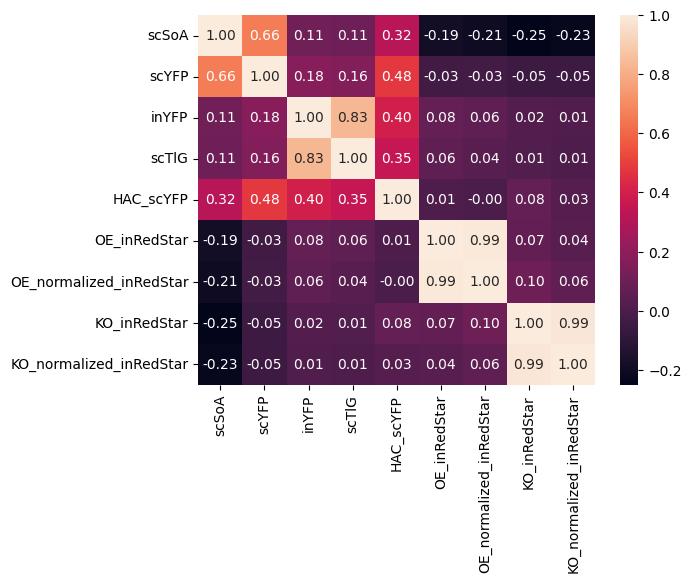

In [27]:
import seaborn as sns

corr_martix = numeric_data.corr()
sns.heatmap(corr_martix, annot=True, fmt=".2f", vmin=-0.25, vmax=1)

In [28]:
#obliczenie istotności statystycznej korelacji

from scipy.stats import pearsonr

for column1 in numeric_data.columns:
    for column2 in numeric_data.columns:
        if column1 != column2:
            correlation_coefficient, p_value = pearsonr(numeric_data[column1], numeric_data[column2])
            if p_value <= 0.05:
                print(f'{column1} vs {column2}: p-value = {p_value}')

scSoA vs scYFP: p-value = 9.738438304198143e-19
scSoA vs HAC_scYFP: p-value = 0.00011557150054032369
scSoA vs OE_inRedStar: p-value = 0.023524067524376975
scSoA vs OE_normalized_inRedStar: p-value = 0.014983400538914685
scSoA vs KO_inRedStar: p-value = 0.0033137864345254633
scSoA vs KO_normalized_inRedStar: p-value = 0.00696617181050756
scYFP vs scSoA: p-value = 9.738438304198143e-19
scYFP vs inYFP: p-value = 0.0375922443935964
scYFP vs HAC_scYFP: p-value = 2.0005215604353753e-09
inYFP vs scYFP: p-value = 0.0375922443935964
inYFP vs scTlG: p-value = 6.2235631021536955e-37
inYFP vs HAC_scYFP: p-value = 1.077294132760917e-06
scTlG vs inYFP: p-value = 6.2235631021536955e-37
scTlG vs HAC_scYFP: p-value = 2.1050176313163376e-05
HAC_scYFP vs scSoA: p-value = 0.00011557150054032369
HAC_scYFP vs scYFP: p-value = 2.0005215604353753e-09
HAC_scYFP vs inYFP: p-value = 1.077294132760917e-06
HAC_scYFP vs scTlG: p-value = 2.1050176313163376e-05
OE_inRedStar vs scSoA: p-value = 0.023524067524376975
OE

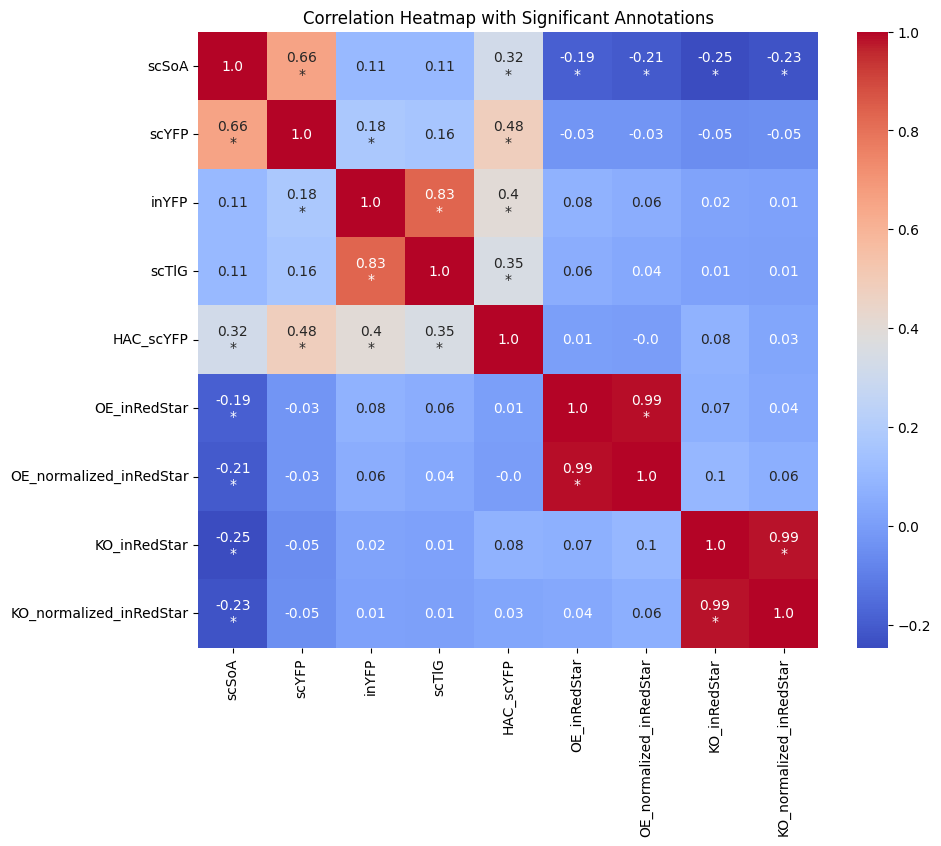

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np


# Calculate the Pearson correlation coefficients and p-values
correlation_matrix = numeric_data.corr()
p_value_matrix = pd.DataFrame(np.ones(correlation_matrix.shape), columns=numeric_data.columns, index=numeric_data.columns)

for column1 in numeric_data.columns:
    for column2 in numeric_data.columns:
        if column1 != column2:
            _, p_value = pearsonr(numeric_data[column1], numeric_data[column2])
            p_value_matrix.loc[column1, column2] = p_value

# Create an annotation matrix with asterisks for significant correlations
annot_matrix = correlation_matrix.round(2).astype(str)

for column1 in numeric_data.columns:
    for column2 in numeric_data.columns:
        if column1 != column2:
            if p_value_matrix.loc[column1, column2] <= 0.05:
                annot_matrix.loc[column1, column2] += '\n*'

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=annot_matrix, fmt='', cmap='coolwarm', cbar=True)

plt.title('Correlation Heatmap with Significant Annotations')
plt.show()


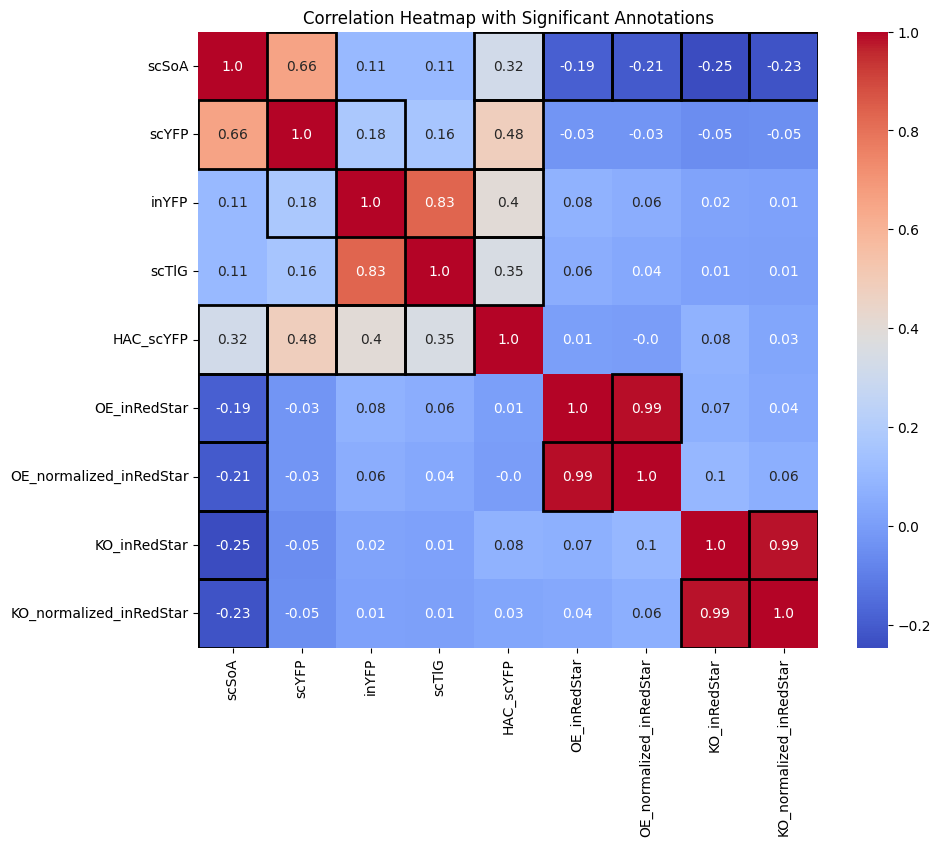

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import matplotlib.patches as patches


# Calculate the Pearson correlation coefficients and p-values
correlation_matrix = numeric_data.corr()
p_value_matrix = pd.DataFrame(np.ones(correlation_matrix.shape), columns=numeric_data.columns, index=numeric_data.columns)

for column1 in numeric_data.columns:
    for column2 in numeric_data.columns:
        if column1 != column2:
            _, p_value = pearsonr(numeric_data[column1], numeric_data[column2])
            p_value_matrix.loc[column1, column2] = p_value

# Create an annotation matrix
annot_matrix = correlation_matrix.round(2).astype(str)

# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=annot_matrix, fmt='', cmap='coolwarm', cbar=True)

# Add rectangles around significant correlations
for column1 in numeric_data.columns:
    for column2 in numeric_data.columns:
        if column1 != column2:
            if p_value_matrix.loc[column1, column2] <= 0.05:
                ax.add_patch(patches.Rectangle((numeric_data.columns.get_loc(column2), numeric_data.columns.get_loc(column1)), 
                                               1, 1, fill=False, edgecolor='black', lw=2))

plt.title('Correlation Heatmap with Significant Annotations')
plt.show()


In [31]:
# Corr matrix all genes from RNA-seq

all_genes_RNA = pd.read_excel('all_transcriptomics_genes_PKW.xlsx')
numeric_data_all_genes = all_genes_RNA.iloc[:, 2:7]


<Axes: >

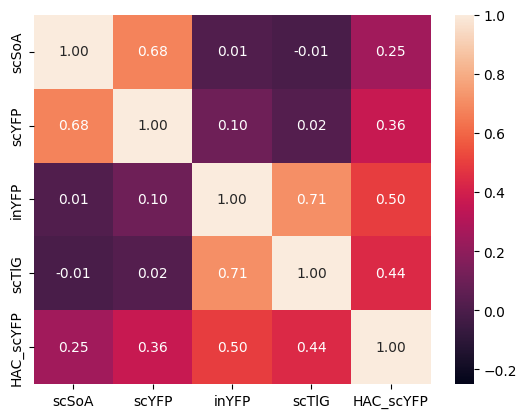

In [32]:
corr_matrix_all_genes = numeric_data_all_genes.corr()
sns.heatmap(corr_matrix_all_genes, annot=True, fmt='.2f', vmin=-0.25, vmax=1.0)

In [33]:
for column1 in numeric_data_all_genes.columns:
    for column2 in numeric_data_all_genes.columns:
        if column1 != column2:
            correlation_coefficient, p_value = pearsonr(numeric_data_all_genes[column1], numeric_data_all_genes[column2])
            if p_value <= 0.05:
                print(f'{column1} vs {column2}: p-value = {p_value}')

scSoA vs scYFP: p-value = 0.0
scSoA vs HAC_scYFP: p-value = 7.342752635522017e-54
scYFP vs scSoA: p-value = 0.0
scYFP vs inYFP: p-value = 2.845650933777797e-10
scYFP vs HAC_scYFP: p-value = 2.3287443741214493e-113
inYFP vs scYFP: p-value = 2.845650933777797e-10
inYFP vs scTlG: p-value = 0.0
inYFP vs HAC_scYFP: p-value = 1.78853401160087e-228
scTlG vs inYFP: p-value = 0.0
scTlG vs HAC_scYFP: p-value = 1.3915922938819973e-170
HAC_scYFP vs scSoA: p-value = 7.342752635522017e-54
HAC_scYFP vs scYFP: p-value = 2.3287443741214493e-113
HAC_scYFP vs inYFP: p-value = 1.78853401160087e-228
HAC_scYFP vs scTlG: p-value = 1.3915922938819973e-170


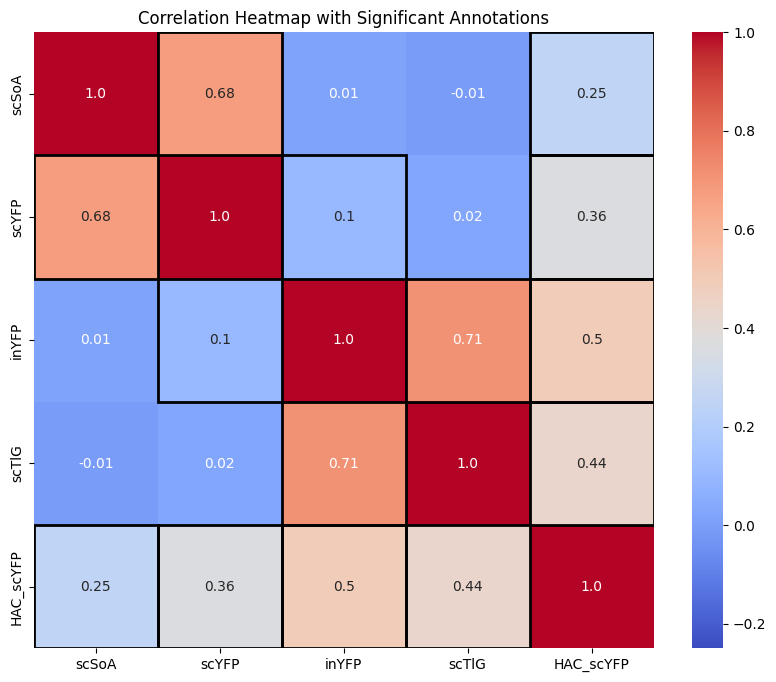

In [37]:
# Calculate the Pearson correlation coefficients and p-values
correlation_matrix_all_genes = numeric_data_all_genes.corr()
p_value_matrix_all_genes = pd.DataFrame(np.ones(correlation_matrix_all_genes.shape), 
                                        columns=numeric_data_all_genes.columns, index=numeric_data_all_genes.columns)

for column1 in numeric_data_all_genes.columns:
    for column2 in numeric_data_all_genes.columns:
        if column1 != column2:
            _, p_value = pearsonr(numeric_data_all_genes[column1], numeric_data_all_genes[column2])
            p_value_matrix_all_genes.loc[column1, column2] = p_value

# Create an annotation matrix
annot_matrix_all_genes = correlation_matrix_all_genes.round(2).astype(str)

# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix_all_genes, annot=annot_matrix_all_genes, fmt='', cmap='coolwarm', cbar=True, vmin=-0.25)

# Add rectangles around significant correlations
for column1 in numeric_data_all_genes.columns:
    for column2 in numeric_data_all_genes.columns:
        if column1 != column2:
            if p_value_matrix_all_genes.loc[column1, column2] <= 0.05:
                ax.add_patch(patches.Rectangle((numeric_data_all_genes.columns.get_loc(column2),
                                                numeric_data_all_genes.columns.get_loc(column1)), 
                                               1, 1, fill=False, edgecolor='black', lw=2))

plt.title('Correlation Heatmap with Significant Annotations')
plt.show()
